In [1]:
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\prans\\Downloads\\^NSEI (1).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-28,15915.349609,15915.650391,15792.150391,15814.700195,15814.700195,255100
1,2021-06-29,15807.500000,15835.900391,15724.049805,15748.450195,15748.450195,360300
2,2021-06-30,15776.900391,15839.099609,15708.750000,15721.500000,15721.500000,262400
3,2021-07-01,15755.049805,15755.549805,15667.049805,15680.000000,15680.000000,224900
4,2021-07-02,15705.849609,15738.349609,15635.950195,15722.200195,15722.200195,254800


In [3]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.995139,0.991483,0.984525,0.984525,0.085137
High,0.995139,1.000000,0.992032,0.992758,0.992758,0.101082
Low,0.991483,0.992032,1.000000,0.994261,0.994261,0.067189
Close,0.984525,0.992758,0.994261,1.000000,1.000000,0.082289
Adj Close,0.984525,0.992758,0.994261,1.000000,1.000000,0.082289
Volume,0.085137,0.101082,0.067189,0.082289,0.082289,1.000000


In [4]:
#need to find support and resistance for this data using k-means clustering

In [5]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

9


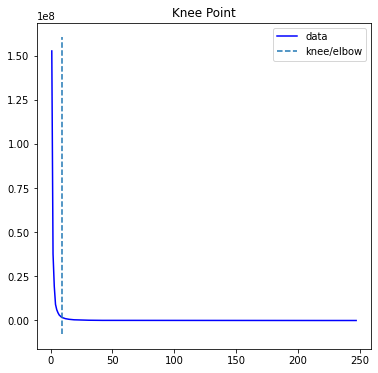

In [6]:
X = np.array(df["Close"])
def knee_point(X):
    sum_of_sq_distances = []
    K = range(1,248)#248 is max
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X.reshape(-1,1))
        sum_of_sq_distances.append(km.inertia_)
    kn = KneeLocator(K, sum_of_sq_distances,S=1.0, curve="convex", direction="decreasing")
    print(kn.knee)
    kn.plot_knee()
knee_point(X)    

In [7]:
#confirming clusters with silhouette method
# from sklearn.metrics import silhouette_score
# range_n_clusters = [2,3,4,5,6,7,8,9]

# silhouette_avg = []
# for num_clusters in range_n_clusters:
 
#  # initialise kmeans
#     kmeans = KMeans(n_clusters=num_clusters)
#     kmeans.fit(X.reshape(-1,1))
#     cluster_labels = kmeans.labels_
 
#  # silhouette score
#     silhouette_avg.append(silhouette_score(X.reshape(-1,1), cluster_labels))
# plt.plot(range_n_clusters,silhouette_avg)
# plt.xlabel("Values of K") 
# plt.ylabel("Silhouette score") 
# plt.title("Silhouette analysis For Optimal k")
# plt.show()


In [8]:
#value = 9

cluster = 9
kmeans = KMeans(n_clusters = cluster).fit(X.reshape(-1,1))
c = kmeans.predict(X.reshape(-1,1))
min_n_max = []
for i in range(cluster):
    min_n_max.append([-np.inf,np.inf])
for i in range(len(X)):
    cluster = c[i]
    if X[i] > min_n_max[cluster][0]:
        min_n_max[cluster][0] = X[i]
    if X[i] < min_n_max[cluster][1]:
        min_n_max[cluster][1] = X[i]
min_n_max        

[[16013.450195, 15632.099609],
 [17711.300781, 17463.800781],
 [17416.550781, 17166.900391],
 [16793.900391, 16450.5],
 [18477.050781, 18044.25],
 [16416.349609, 16025.799805],
 [17153.0, 16842.800781],
 [15556.650391, 15293.5],
 [18017.199219, 17745.900391]]

In [9]:
rval = [17416.550781,16416.349609,18017.199219,15556.650391,17711.300781,16793.900391,18477.050781,16013.450195,17153.0]
sval = [17166.900391,16025.799805,17745.900391,15293.5,17463.800781,16450.5,18044.25,15632.099609,16842.800781]

In [10]:
df["Close"].describe()

count      248.000000
mean     17000.392547
std        786.168176
min      15293.500000
25%      16350.675048
50%      17169.424805
75%      17608.674804
max      18477.050781
Name: Close, dtype: float64

In [11]:
df2 = df.copy()
Resistance,Support = [None]*len(X),[None]*len(X)
for i in range(len(X)):
    if X[i] in rval:
        Resistance[i] = 1
    else:
        Resistance[i] = 0
    if X[i] in sval:
        Support[i] = 1
    else:
        Support[i] = 0
df2["Resistance"] = Resistance
df2["Support"] = Support
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Resistance,Support
0,2021-06-28,15915.349609,15915.650391,15792.150391,15814.700195,15814.700195,255100,0,0
1,2021-06-29,15807.500000,15835.900391,15724.049805,15748.450195,15748.450195,360300,0,0
2,2021-06-30,15776.900391,15839.099609,15708.750000,15721.500000,15721.500000,262400,0,0
3,2021-07-01,15755.049805,15755.549805,15667.049805,15680.000000,15680.000000,224900,0,0
4,2021-07-02,15705.849609,15738.349609,15635.950195,15722.200195,15722.200195,254800,0,0


In [12]:
df2.corr()

,Open,High,Low,Close,Adj Close,Volume,Resistance,Support
Open,1.000000,0.995139,0.991483,0.984525,0.984525,0.085137,0.006681,-0.058958
High,0.995139,1.000000,0.992032,0.992758,0.992758,0.101082,0.014626,-0.064641
Low,0.991483,0.992032,1.000000,0.994261,0.994261,0.067189,0.000742,-0.056333
Close,0.984525,0.992758,0.994261,1.000000,1.000000,0.082289,0.015168,-0.064251
Adj Close,0.984525,0.992758,0.994261,1.000000,1.000000,0.082289,0.015168,-0.064251
Volume,0.085137,0.101082,0.067189,0.082289,0.082289,1.000000,0.161199,-0.035619
Resistance,0.006681,0.014626,0.000742,0.015168,0.015168,0.161199,1.000000,-0.037657
Support,-0.058958,-0.064641,-0.056333,-0.064251,-0.064251,-0.035619,-0.037657,1.000000


In [24]:
df2["Date"] = pd.to_datetime(df2["Date"]).dt.strftime("%Y%m%d")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Resistance,Support
0,20210628,15915.349609,15915.650391,15792.150391,15814.700195,15814.700195,255100,0,0
1,20210629,15807.500000,15835.900391,15724.049805,15748.450195,15748.450195,360300,0,0
2,20210630,15776.900391,15839.099609,15708.750000,15721.500000,15721.500000,262400,0,0
3,20210701,15755.049805,15755.549805,15667.049805,15680.000000,15680.000000,224900,0,0
4,20210702,15705.849609,15738.349609,15635.950195,15722.200195,15722.200195,254800,0,0


In [34]:
df_r = df2.groupby(df2.Resistance)
df_s = df2.groupby(df2.Support)
df_r1 = df_r.get_group(1)
df_r0 = df_r.get_group(0)
df_s1 = df_s.get_group(1)
df_s0 = df_s.get_group(0)
df_m = pd.merge(df_s0,df_r0,how ="inner")

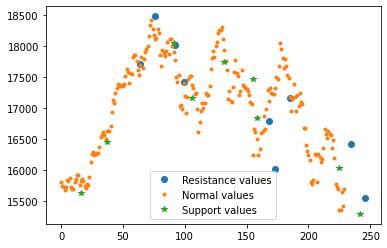

In [37]:
plt.plot(df_r1.Close,"o",label = "Resistance values")
plt.plot(df_m.Close ,".",label = "Normal values")
plt.plot(df_s1.Close,"*",label = "Support values")
plt.legend()
plt.show()